In [163]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

In [55]:
def investigate_comp(comp, resdf):
    def avg_cols(df, cols):
        return df[cols].mean(axis=1)
    comp_list = list(range(0,resdf.shape[1]))
    comp_list.remove(comp)
    other_pts = avg_cols(resdf,comp_list)
    return resdf[comp] - other_pts
    

In [227]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

<Axes: >

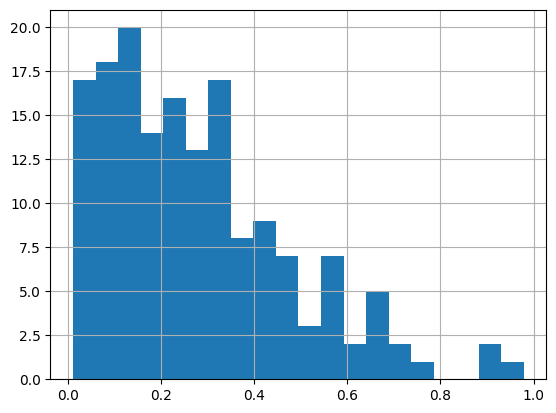

In [35]:
sympdf.mean().hist(bins=20)

In [36]:
sympdf.mean().sort_values(ascending=False).head(10)
# we're filtering out fatigue, short term memory only (ok)

Symptom_Fatigue                                         0.979440
Symptom_Memory_short                                    0.924225
Symptom_PEM                                             0.883601
Symptom_Cognitive_Functioning_attentionconcentration    0.752943
Symptom_Shortness_of_breath                             0.736860
Symptom_Insomnia                                        0.693252
Symptom_Tightness_of_chest                              0.680153
Symptom_Muscle_aches                                    0.677168
Symptom_Dizziness_vertigo                               0.672525
Symptom_Cognitive_Functioning_thinking                  0.666225
dtype: float64

In [37]:
# while these are rare, combos of rare sypmtoms might group together
# and some are particularly significant. I think I could either filter at the 5% mark on either side
# or I could  
sympdf.mean().sort_values(ascending=True).head(40)


Symptom_Eye_Vision_loss_of_vision                         0.011109
Symptom_Reproductive_early_menopause                      0.013928
Symptom_Reproductive_postmenopausal_bleeding              0.016084
Symptom_Hallucinations_other                              0.023379
Symptom_SkinAllergy_shingles                              0.025701
Symptom_Heightened_taste                                  0.030841
Symptom_Sensations_facial_paralysis                       0.032001
Symptom_Hallucinations_tactile                            0.033659
Symptom_Reproductive_testicle_penis_pain_changes          0.036478
Symptom_Eye_Vision_tunnel_vision                          0.038302
Symptom_New_anaphylaxis                                   0.042945
Symptom_Speech_other                                      0.043111
Symptom_Coughing_up_blood                                 0.047919
Symptom_Ear_numbness                                      0.049411
Symptom_Inability_to_yawn                                 0.05

In [38]:
# the formal rec might be 10% but I think I'm going to go with 5% for now
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]

In [39]:
sympdf.shape

(6031, 147)

In [40]:
# patient is a mixture of classes but it's meant to represent probs rather than actual multiple class labels
# so this model is less complex, but it might still be more appropriate, it'll depend

model = StepMix(n_components=9, measurement="binary", verbose=0, random_state=123)


In [41]:
model.fit(sympdf)


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.72s/it, max_LL=-4.1e+5, max_avg_LL=-68]


StepMix(measurement='binary', n_components=9, random_state=123)

In [105]:
grid = {
    'n_components': [ 2,3, 4,5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
}

# no gaussians or whatever, so n_steps can just be 1 

gs = GridSearchCV(estimator=model, cv=3, param_grid=grid, verbose=0)
gs.fit(sympdf)



Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.37it/s, max_LL=-2.87e+5, max_avg_LL=-71.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  8.03it/s, max_LL=-2.86e+5, max_avg_LL=-71.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.26it/s, max_LL=-2.88e+5, max_avg_LL=-71.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.40it/s, max_LL=-2.8e+5, max_avg_LL=-69.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.03it/s, max_LL=-2.8e+5, max_avg_LL=-69.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.07it/s, max_LL=-2.83e+5, max_avg_LL=-70.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.91it/s, max_LL=-2.78e+5, max_avg_LL=-69.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.48it/s, max_LL=-2.78e+5, max_avg_LL=-69]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.60it/s, max_LL=-2.8e+5, max_avg_LL=-69.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.16s/it, max_LL=-2.75e+5, max_avg_LL=-68.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.84it/s, max_LL=-2.76e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.02s/it, max_LL=-2.78e+5, max_avg_LL=-69.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.07s/it, max_LL=-2.75e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.17it/s, max_LL=-2.74e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  2.25it/s, max_LL=-2.77e+5, max_avg_LL=-68.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.01s/it, max_LL=-2.73e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.34s/it, max_LL=-2.74e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.41it/s, max_LL=-2.76e+5, max_avg_LL=-68.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.30it/s, max_LL=-2.72e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.08s/it, max_LL=-2.73e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  1.12it/s, max_LL=-2.76e+5, max_avg_LL=-68.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.52s/it, max_LL=-2.72e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.42s/it, max_LL=-2.72e+5, max_avg_LL=-67.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:01<00:00,  1.53s/it, max_LL=-2.75e+5, max_avg_LL=-68.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.40s/it, max_LL=-2.71e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.42s/it, max_LL=-2.71e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.42s/it, max_LL=-2.74e+5, max_avg_LL=-68.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.24s/it, max_LL=-2.71e+5, max_avg_LL=-67.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.81s/it, max_LL=-2.71e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.53s/it, max_LL=-2.74e+5, max_avg_LL=-68.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.81s/it, max_LL=-2.7e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.88s/it, max_LL=-2.7e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.34s/it, max_LL=-2.73e+5, max_avg_LL=-68]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.62s/it, max_LL=-2.7e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.76s/it, max_LL=-2.7e+5, max_avg_LL=-67.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.02s/it, max_LL=-2.73e+5, max_avg_LL=-67.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.59s/it, max_LL=-2.69e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.39s/it, max_LL=-2.69e+5, max_avg_LL=-67]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.74s/it, max_LL=-2.73e+5, max_avg_LL=-67.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.32s/it, max_LL=-2.69e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:14<00:00, 14.04s/it, max_LL=-2.69e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.26s/it, max_LL=-2.72e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.14s/it, max_LL=-2.68e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.06s/it, max_LL=-2.68e+5, max_avg_LL=-66.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.29s/it, max_LL=-2.72e+5, max_avg_LL=-67.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.95s/it, max_LL=-2.68e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.51s/it, max_LL=-2.68e+5, max_avg_LL=-66.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.25s/it, max_LL=-2.71e+5, max_avg_LL=-67.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:15<00:00, 15.30s/it, max_LL=-2.68e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.16s/it, max_LL=-2.68e+5, max_avg_LL=-66.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.26s/it, max_LL=-2.71e+5, max_avg_LL=-67.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.26s/it, max_LL=-2.67e+5, max_avg_LL=-66.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.60s/it, max_LL=-2.67e+5, max_avg_LL=-66.5]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.91s/it, max_LL=-2.71e+5, max_avg_LL=-67.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.81s/it, max_LL=-2.67e+5, max_avg_LL=-66.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.04s/it, max_LL=-2.67e+5, max_avg_LL=-66.4]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.63s/it, max_LL=-2.7e+5, max_avg_LL=-67.2]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.15s/it, max_LL=-2.67e+5, max_avg_LL=-66.3]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.83s/it, max_LL=-2.67e+5, max_avg_LL=-66.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.30s/it, max_LL=-2.7e+5, max_avg_LL=-67.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.70s/it, max_LL=-2.66e+5, max_avg_LL=-66.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.69s/it, max_LL=-2.66e+5, max_avg_LL=-66.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.73s/it, max_LL=-2.7e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.78s/it, max_LL=-2.66e+5, max_avg_LL=-66.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.54s/it, max_LL=-2.66e+5, max_avg_LL=-66.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.90s/it, max_LL=-2.7e+5, max_avg_LL=-67.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.46s/it, max_LL=-2.66e+5, max_avg_LL=-66.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.56s/it, max_LL=-2.66e+5, max_avg_LL=-66.1]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.01s/it, max_LL=-2.69e+5, max_avg_LL=-67]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.80s/it, max_LL=-2.66e+5, max_avg_LL=-66.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.18s/it, max_LL=-2.66e+5, max_avg_LL=-66.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.44s/it, max_LL=-2.69e+5, max_avg_LL=-66.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:18<00:00, 18.96s/it, max_LL=-4.02e+5, max_avg_LL=-66.6]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=StepMix(measurement='binary', n_components=30,
                               random_state=123),
             param_grid={'n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25]})

In [106]:
results = pd.DataFrame(gs.cv_results_)
results["Val. Log Likelihood"] = results['mean_test_score']

In [107]:
results_old = results.copy()

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_30497/1270231869.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='param_n_components', y='Val. Log Likelihood',


<Axes: xlabel='param_n_components', ylabel='Val. Log Likelihood'>

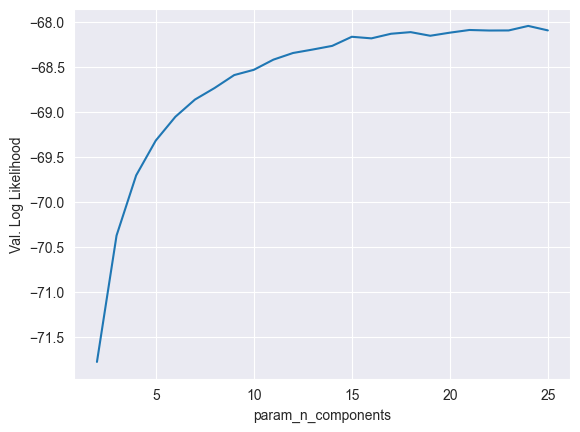

In [108]:
sns.set_style("darkgrid")
sns.lineplot(data=results, x='param_n_components', y='Val. Log Likelihood',
              palette='Dark2')

In [109]:
%%capture
results = dict(param_n_components=[], aic=[], bic=[])

# Same model and grid as above
for g in ParameterGrid(grid):
    model.set_params(**g)
    model.fit(sympdf)
    results['param_n_components'].append(g['n_components'])
    results['aic'].append(model.aic(sympdf))
    results['bic'].append(model.bic(sympdf))

# Save results to a dataframe
results = pd.DataFrame(results)

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_30497/63445388.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='param_n_components', y='aic',


<Axes: xlabel='param_n_components', ylabel='aic'>

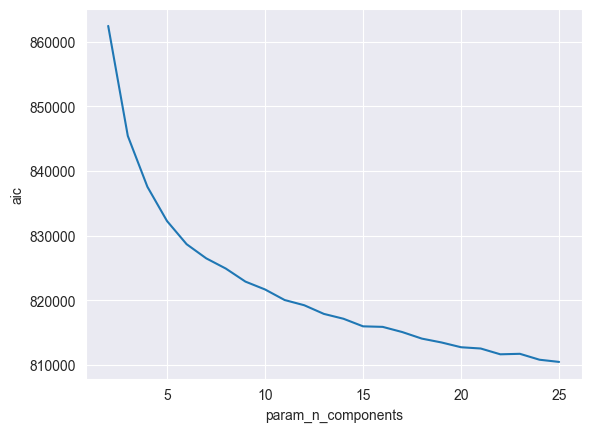

In [110]:
sns.lineplot(data=results, x='param_n_components', y='aic',
             palette='Dark2')

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_30497/2943425988.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='param_n_components', y='bic',


<Axes: xlabel='param_n_components', ylabel='bic'>

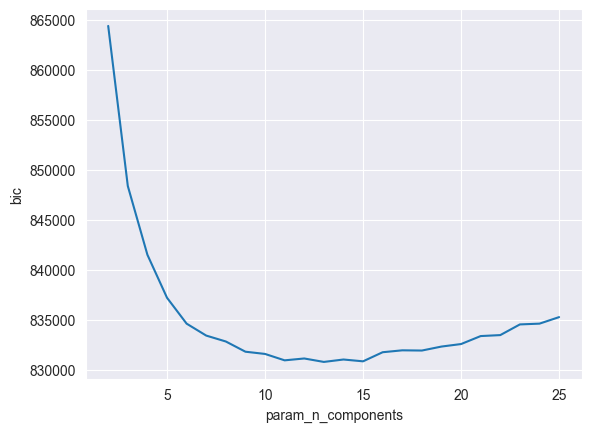

In [111]:
sns.lineplot(data=results, x='param_n_components', y='bic',
            palette='Dark2')

In [158]:
results['bic']

0     864408.297437
1     848399.414397
2     841521.750646
3     837221.847609
4     834632.787238
5     833438.968043
6     832848.419047
7     831826.406880
8     831603.519579
9     830963.400616
10    831149.027566
11    830805.056825
12    831045.895899
13    830864.782671
14    831774.776408
15    831965.064220
16    831943.266957
17    832341.371080
18    832593.310989
19    833391.097285
20    833488.083282
21    834555.261449
22    834633.571691
23    835286.450507
Name: bic, dtype: float64

In [152]:
# print the row of results with the lowest bic
results.iloc[results['bic'].idxmin()]


param_n_components        13.000000
aic                   817911.980043
bic                   830805.056825
Name: 11, dtype: float64

We observe that the Bayes information criteria is optimal at 13 clusters

Based on https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7746621/?fbclid=IwAR3Gy0vBZIDrylHZpe9I0zlDiNaV1WaUrPMcAZO9seZJzkOoM6ZNeLEUd98 for a model of this size it is reasonable to use BIC, so I'm going to go ahead with 13 classes. If they end up looking highly redundant or one is especially small we can plan to scale back. 

In [132]:
model = StepMix(n_components=13, measurement="binary", verbose=1, random_state=123)
model.fit(sympdf)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.43s/it, max_LL=-4.07e+5, max_avg_LL=-67.5]

MODEL REPORT
    Measurement model parameters
          model_name                                                    binary                                                                                                
          class_no                                                          0       1       2       3       4       5       6       7       8       9       10      11      12
          param variable                                                                                                                                                      
          pis   Symptom_Acid_reflux                                     0.3693  0.7781  0.2619  0.3117  0.0706  0.3789  0.4997  0.6073  0.1093  0.1463  0.4345  0.2003  0.5584
                Symptom_Acute_confusion                                 0.1589  0.7294  0.3328  0.0065  0.0026  0.1375  0.2719  0.5439  0.0261  0.0623  0.1015  0.1926  0.3039
                Symptom_Altered_smell                                   0.2341 

StepMix(measurement='binary', n_components=13, random_state=123, verbose=1)

In [164]:
# save model using pkl
with open('output/stepmix_13_111023.pkl', 'wb') as f:
    pkl.dump(model, f)

In [165]:
mm = model.get_mm_df()
mm = mm.reset_index()
mm  = mm.drop("model_name",axis=1)
mm  = mm.drop("param",axis=1)
mm.index=mm['variable']
mm = mm.drop("variable", axis=1)

mm.to_csv("output/stepmix_13_111023_mmdf.csv")

/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:1173: FutureWarning: The provided callable <function mean at 0x10a0daf20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [123]:
# These are just the most prevalent symptoms per cluster
# in general, this is dominated by symptoms with high cross-dataset prevalence
print(mm.sort_values(0,ascending=False).head(10).index)
print(mm.sort_values(2,ascending=False).head(10).index)
print(mm.sort_values(3,ascending=False).head(10).index)
print(mm.sort_values(4,ascending=False).head(10).index)
print(mm.sort_values(5,ascending=False).head(10).index)
print(mm.sort_values(6,ascending=False).head(10).index)
print(mm.sort_values(7,ascending=False).head(10).index)

Index(['Symptom_PEM', 'Symptom_Memory_short', 'Symptom_Insomnia',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Shortness_of_breath', 'Symptom_Tightness_of_chest',
       'Symptom_Cognitive_Functioning_thinking', 'Symptom_Dizziness_vertigo',
       'Symptom_Muscle_aches', 'Symptom_Elevated_temp'],
      dtype='object', name='variable')
Index(['Symptom_Speech_difficulty_finding_words', 'Symptom_PEM',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Cognitive_Functioning_thinking',
       'Symptom_Cognitive_Functioning_executive', 'Symptom_Memory_short',
       'Symptom_Cognitive_Functioning_problemsolving',
       'Symptom_Dizziness_vertigo', 'Symptom_Muscle_aches',
       'Symptom_Memory_long'],
      dtype='object', name='variable')
Index(['Symptom_Memory_short', 'Symptom_PEM', 'Symptom_Shortness_of_breath',
       'Symptom_Tightness_of_chest', 'Symptom_Heart_palpitations',
       'Symptom_Insomnia', 'Symptom_Dry_cough', '

In [169]:
df['cluster'] = model.predict(sympdf)

<Axes: xlabel='cluster'>

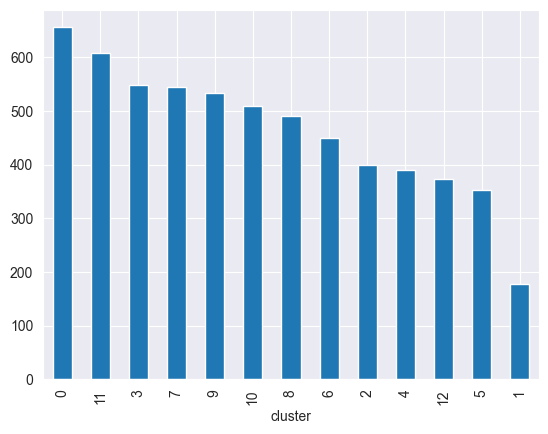

In [170]:
df['cluster'].value_counts().plot(kind='bar')
# all clusters have more than 150 patients

In [171]:
comp_list = list(range(0,13))

variable
Symptom_Acid_reflux                0.449128
Symptom_Acute_confusion            0.551001
Symptom_Altered_smell              0.413470
Symptom_Altered_taste              0.417033
Symptom_Awakened_cannot_breathe    0.501827
                                     ...   
Symptom_Vibrating_sensations       0.535182
Symptom_Vivid_dreams               0.438467
Symptom_Vomiting                   0.321097
Symptom_Waking_up_early            0.344633
Symptom_Waking_up_in_night         0.381768
Length: 147, dtype: float64

In [179]:
edges = [] 
symp_unusual = pd.DataFrame()
for component in comp_list:
    edges +=investigate_comp(component, mm).sort_values(ascending=False).head(10).index.tolist()
    symp_unusual[component] = investigate_comp(component, mm)
    print(investigate_comp(component, mm).sort_values(ascending=False).head(10))

variable
Symptom_Insomnia                                        0.218484
Symptom_Elevated_temp                                   0.148532
Symptom_Waking_up_in_night                              0.146606
Symptom_Fever                                           0.140825
Symptom_Temp_lability                                   0.111653
Symptom_Night_sweats                                    0.105507
Symptom_Cognitive_Functioning_attentionconcentration    0.105479
Symptom_Sleep_other                                     0.098183
Symptom_Shortness_of_breath                             0.093935
Symptom_Diarrhea                                        0.092397
dtype: float64
variable
Symptom_Eye_Vision_sensitivity_to_light                  0.668781
Symptom_Difficulty_swallowing                            0.603389
Symptom_SkinAllergy_itchy_eyes                           0.599980
Symptom_SkinAllergy_itchy_skin                           0.598828
Symptom_Muscle_spasms                                

In [129]:
print(df.cluster.value_counts().sort_index())

cluster
0     656
1     178
2     399
3     549
4     389
5     352
6     449
7     544
8     490
9     534
10    509
11    608
12    374
Name: count, dtype: int64


In [130]:
(sympdf[edges].mean()>.90).sum()

3

In [131]:
(sympdf[edges].mean()<.1).sum()
# some of the pretty rare symptoms are cluster-decisive
# I'm going to keep them in unless something pathological emerges downstream

17

In [181]:
symp_unusual.to_csv("output/stepmix_13_111023_symp_unusual.csv")

In [177]:
# plan for next time 
# plot the clusters in 2d space
# go through that sklearn paper for some plot ideas
# look at the various non-used parameters and how they assort
# look at demographics, other columns of df
# assess distinguisability of clusters--maybe some can combine?

# could laplace approximation be used to get a better estimate of the number of clusters?
# if have reason to think p(data | model ) is close to p(model), then maybe justify fewer clusters

In [183]:
mm[0]

variable
Symptom_Acid_reflux                0.369313
Symptom_Acute_confusion            0.158894
Symptom_Altered_smell              0.234075
Symptom_Altered_taste              0.294896
Symptom_Awakened_cannot_breathe    0.411089
                                     ...   
Symptom_Vibrating_sensations       0.293808
Symptom_Vivid_dreams               0.413275
Symptom_Vomiting                   0.174588
Symptom_Waking_up_early            0.280046
Symptom_Waking_up_in_night         0.622473
Name: 0, Length: 147, dtype: float64

In [199]:
# check if patients asigned to cluster 0 have average scores equivalent to column 0 of mm
# this is a bit of a sanity check

mm[0].sort_index()

df[df.cluster==0][sympdf.columns].mean().sort_index()

Symptom_Acid_reflux                0.375000
Symptom_Acute_confusion            0.160061
Symptom_Altered_smell              0.234756
Symptom_Altered_taste              0.300305
Symptom_Awakened_cannot_breathe    0.422256
                                     ...   
Symptom_Vibrating_sensations       0.291159
Symptom_Vivid_dreams               0.417683
Symptom_Vomiting                   0.169207
Symptom_Waking_up_early            0.283537
Symptom_Waking_up_in_night         0.623476
Length: 147, dtype: float64

In [202]:
model.predict(sympdf)

array([ 8, 11, 10, ...,  6,  8, 11])

In [208]:
df['cluster'].to_csv("output/cluster_13_111023.csv")

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Demographics_Age_Cleaned,Flag_MECFS,Flag_POTS,Flag_MCAS,FAS,FAS_cat,Physical_PEM_Severity,Cognitive_PEM_Severity,HasPeriods,cluster
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,30-39,1.0,"No, no tachycardia",1.0,20.0,Minimal/No Fatigue,5.0,5.0,NaN,8
5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,40-49,1.0,"No, no tachycardia",0.0,30.0,Fatigue,9.0,7.0,"No, other reason",11
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,40-49,1.0,"Possible, had tachycardia/palpitations",0.0,20.0,Minimal/No Fatigue,8.0,0.0,"No, other reason",10
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,40-49,1.0,"Definite, measured bpm > 30",0.0,19.0,Minimal/No Fatigue,7.0,4.0,Yes,0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,40-49,1.0,"Possible, had tachycardia/palpitations",0.0,20.0,Minimal/No Fatigue,10.0,0.0,Yes,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,50-59,1.0,"Possible, had tachycardia/palpitations",2.0,32.0,Fatigue,8.0,6.0,"No, post-menopausal",2
14161,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,30-39,1.0,"Likely, had higher bpm standing",1.0,26.0,Fatigue,10.0,9.0,"No, other reason",11
14163,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,30-39,0.0,"Definite, measured bpm > 30",1.0,33.0,Fatigue,8.0,7.0,Yes,6
14166,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,60-69,0.0,"No, no tachycardia",0.0,18.0,Minimal/No Fatigue,NaN,NaN,NaN,8


In [209]:
model = StepMix(n_components=11, measurement="binary", verbose=1, random_state=123)
model.fit(sympdf)

# save model using pkl
with open('output/stepmix_11_111023.pkl', 'wb') as f:
    pkl.dump(model, f)

df['cluster_11'] = model.predict(sympdf)
df['cluster_11'].to_csv("output/cluster_11_111023.csv")

mm = model.get_mm_df()
mm = mm.reset_index()
mm  = mm.drop("model_name",axis=1)
mm  = mm.drop("param",axis=1)
mm.index=mm['variable']
mm = mm.drop("variable", axis=1)

mm.to_csv("output/stepmix_11_111023_mmdf.csv")

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.34s/it, max_LL=-4.08e+5, max_avg_LL=-67.7]

MODEL REPORT
    Measurement model parameters
          model_name                                                    binary                                                                                
          class_no                                                          0       1       2       3       4       5       6       7       8       9       10
          param variable                                                                                                                                      
          pis   Symptom_Acid_reflux                                     0.3722  0.7065  0.2993  0.1075  0.4223  0.3268  0.2751  0.4683  0.1549  0.5711  0.0681
                Symptom_Acute_confusion                                 0.1594  0.6703  0.0073  0.0355  0.0894  0.2649  0.1831  0.4116  0.0847  0.2947  0.0026
                Symptom_Altered_smell                                   0.2375  0.5496  0.1277  0.1713  0.1008  0.2425  0.2020  0.2954  0.1484  0.3320  0.1828



/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:1173: FutureWarning: The provided callable <function mean at 0x10a0daf20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [211]:
edges = [] 
symp_unusual = pd.DataFrame()
comp_list = list(range(0,11))
for component in comp_list:
    edges +=investigate_comp(component, mm).sort_values(ascending=False).head(10).index.tolist()
    symp_unusual[component] = investigate_comp(component, mm)
    print(investigate_comp(component, mm).sort_values(ascending=False).head(10))

variable
Symptom_Insomnia                                        0.186870
Symptom_Elevated_temp                                   0.184463
Symptom_Fever                                           0.173621
Symptom_Temp_lability                                   0.147458
Symptom_Waking_up_in_night                              0.136063
Symptom_Diarrhea                                        0.128760
Symptom_Loss_of_appetite                                0.126470
Symptom_Cognitive_Functioning_attentionconcentration    0.120983
Symptom_Shortness_of_breath                             0.117909
Symptom_Night_sweats                                    0.113454
dtype: float64
variable
Symptom_Eye_Vision_sensitivity_to_light                  0.641131
Symptom_Speech_difficulty_understanding_others_speech    0.601219
Symptom_Speech_difficulty_reading_processing_text        0.594107
Symptom_Speech_difficulty_communicating_verbally         0.578390
Symptom_Neuralgia                                    

In [212]:
symp_unusual.to_csv("output/stepmix_11_111023_symp_unusual.csv")

In [213]:
model = StepMix(n_components=9, measurement="binary", verbose=1, random_state=123)
model.fit(sympdf)

# save model using pkl
with open('output/stepmix_9_111023.pkl', 'wb') as f:
    pkl.dump(model, f)

df['cluster_9'] = model.predict(sympdf)
df['cluster_9'].to_csv("output/cluster_9_111023.csv")

mm = model.get_mm_df()
mm = mm.reset_index()
mm  = mm.drop("model_name",axis=1)
mm  = mm.drop("param",axis=1)
mm.index=mm['variable']
mm = mm.drop("variable", axis=1)

mm.to_csv("output/stepmix_9_111023_mmdf.csv")

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.05s/it, max_LL=-4.1e+5, max_avg_LL=-68]

MODEL REPORT
    Measurement model parameters
          model_name                                                    binary                                                                
          class_no                                                           0       1       2       3       4       5       6       7       8
          param variable                                                                                                                      
          pis   Symptom_Acid_reflux                                     0.1787  0.6871  0.4223  0.2089  0.5716  0.1932  0.3895  0.0583  0.4143
                Symptom_Acute_confusion                                 0.0203  0.6626  0.0789  0.0431  0.3098  0.1851  0.1713  0.0028  0.3237
                Symptom_Altered_smell                                   0.1501  0.5173  0.1052  0.1385  0.3200  0.1895  0.2603  0.1826  0.2660
                Symptom_Altered_taste                                   0.1624  0.6012  0.1666  


/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:1173: FutureWarning: The provided callable <function mean at 0x10a0daf20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [214]:
edges = [] 
symp_unusual = pd.DataFrame()
comp_list = list(range(0,9))
for component in comp_list:
    edges +=investigate_comp(component, mm).sort_values(ascending=False).head(10).index.tolist()
    symp_unusual[component] = investigate_comp(component, mm)
    print(investigate_comp(component, mm).sort_values(ascending=False).head(10))

variable
Symptom_Insomnia                       0.369825
Symptom_Waking_up_in_night             0.189877
Symptom_Difficulty_falling_asleep      0.113352
Symptom_Waking_up_early                0.075175
Symptom_Memory_short                  -0.018539
Symptom_Sleep_apnea                   -0.027429
Symptom_Cognitive_Functioning_other   -0.030966
Symptom_Inability_to_yawn             -0.036932
Symptom_Respiratory_other             -0.038293
Symptom_SkinAllergy_other_itchy       -0.042657
dtype: float64
variable
Symptom_Speech_difficulty_reading_processing_text        0.643237
Symptom_Speech_difficulty_understanding_others_speech    0.642975
Symptom_Speech_difficulty_communicating_verbally         0.634672
Symptom_Eye_Vision_sensitivity_to_light                  0.611330
Symptom_Speech_difficulty_finding_words                  0.588105
Symptom_Speech_difficulty_speaking_complete_sentences    0.584164
Symptom_Ear_sensitivity_to_noise                         0.561123
Symptom_Eye_Vision_blurre

In [215]:
symp_unusual.to_csv("output/stepmix_9_111023_symp_unusual.csv")

In [217]:
sympdf

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Symptom_Gastrointestinal_abdominal_pain,Symptom_Gastrointestinal_hyperactive_bowel,Symptom_SkinAllergy_itchy_skin,Symptom_SkinAllergy_itchy_eyes,Symptom_SkinAllergy_heighted_reaction_allergies,Symptom_SkinAllergy_brittle_nail,Symptom_SkinAllergy_other_itchy,Symptom_PEM,Symptom_Change_sensitivity_to_meds,Symptom_New_allergies
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1
5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,1,0,0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,1,0,0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,1,1,0,1,0,1,1,0
14161,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,1,0,0
14163,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,1,1,0
14166,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
model = StepMix(n_components=12, measurement="binary", verbose=1, random_state=123)
model.fit(sympdf)

# save model using pkl
with open('output/stepmix_12_111023.pkl', 'wb') as f:
    pkl.dump(model, f)

df['cluster_12'] = model.predict(sympdf)
df['cluster_12'].to_csv("output/cluster_12_111023.csv")

mm = model.get_mm_df()
mm = mm.reset_index()
mm  = mm.drop("model_name",axis=1)
mm  = mm.drop("param",axis=1)
mm.index=mm['variable']
mm = mm.drop("variable", axis=1)

mm.to_csv("output/stepmix_12_111023_mmdf.csv")

edges = [] 
symp_unusual = pd.DataFrame()
comp_list = list(range(0,12))
for component in comp_list:
    edges +=investigate_comp(component, mm).sort_values(ascending=False).head(10).index.tolist()
    symp_unusual[component] = investigate_comp(component, mm)
    print(investigate_comp(component, mm).sort_values(ascending=False).head(10))

symp_unusual.to_csv("output/stepmix_12_111023_symp_unusual.csv")

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:02<00:00,  2.27s/it, max_LL=-4.08e+5, max_avg_LL=-67.6]

MODEL REPORT
    Measurement model parameters
          model_name                                                    binary                                                                                        
          class_no                                                          0       1       2       3       4       5       6       7       8       9       10      11
          param variable                                                                                                                                              
          pis   Symptom_Acid_reflux                                     0.4034  0.6681  0.3287  0.3862  0.2557  0.4674  0.1419  0.0623  0.3630  0.4402  0.7082  0.1162
                Symptom_Acute_confusion                                 0.2996  0.3148  0.2356  0.1182  0.0103  0.4411  0.1473  0.0036  0.1149  0.1006  0.6918  0.0450
                Symptom_Altered_smell                                   0.2706  0.3709  0.2576  0.2320  0.1273  0.2871 


/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:1173: FutureWarning: The provided callable <function mean at 0x10a0daf20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [221]:
preddf = pd.DataFrame(model.predict_proba(sympdf), index=sympdf.index)

In [222]:
preddf[preddf > 0.5].notna().sum(axis=1).value_counts()

1    5937
0      94
Name: count, dtype: int64

In [223]:
poor_fits = preddf[preddf[preddf > 0.5].notna().sum(axis=1) == 0].index.values

In [224]:
df = df[~df.index.isin(poor_fits)]

<Axes: xlabel='cluster_12'>

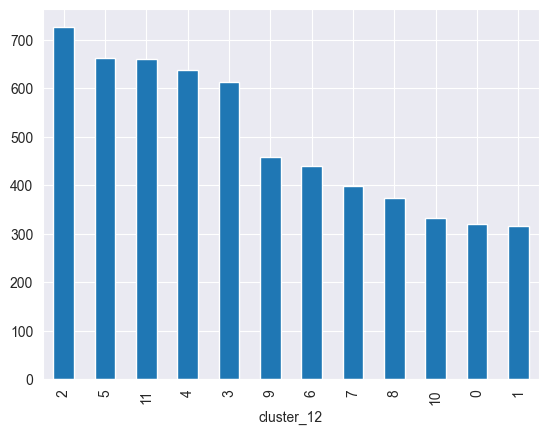

In [226]:
df["cluster_12"].value_counts().plot(kind="bar")


In [ ]:
# I'm going to go out on a limb and guess that the poor silhuette scores are just a reflection of poor assortment of patients